## 1. Tensorflow/Keras Basic


### 1.1. Tensorflow/Keras import

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


### 1.2. Tensorflow / Keras sneak peek

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

#MNIST dataset download
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#Generate Model, compile
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(128, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [5]:
#Training, Evaluation
model.fit(x_train, y_train, epochs = 10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.3027 - accuracy: 0.9113
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1453 - accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0761 - accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9819
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9820
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9837
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0709

[0.0709434226155281, 0.9799000024795532]

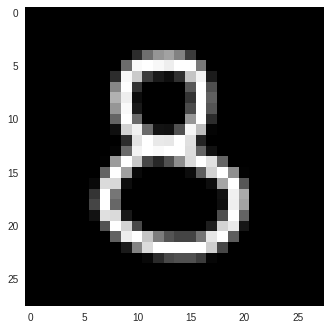

In [6]:
import os
from PIL import Image

#Input new test image

#Set path of image file
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, "image.png")

#Read image file
cur_img = Image.open(img_path)

#Resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

#If image channel is RGB, change it to gray scale
try:
    image = np.mean(image, axis = 2)
except:
    pass

#Change to black background and white character like MNIST data
image = np.abs(255 - image)

#Normalization
image = image.astype(np.float32) / 255.

#Confirm
plt.imshow(image, cmap = "gray")
#plt.xticks([])
#plt.yticks([])
plt.grid(False)
plt.show()

In [7]:
#Predict
image = np.reshape(image, (1, 28, 28))
print(model.predict(image))

print("Model이 예측한 값은 {} 입니다.".format(np.argmax(model.predict(image), -1)))

[[9.88808279e-06 4.64143777e-05 1.89332815e-03 4.56070267e-02
  2.06294321e-02 5.31406030e-02 1.14576134e-04 3.26786212e-05
  8.56258750e-01 2.22672429e-02]]
Model이 예측한 값은 [8] 입니다.


## 2. Dataset

### 2.1. Load FashionMNIST data

In [8]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
#Confirm shape, type
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape,"\n")

print(type(train_images), type(train_labels))
print(type(test_images), type(test_labels))

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,) 

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
#Check the number of images per class
train_unique, train_counts = np.unique(train_labels, return_counts = True)
print(dict(zip(train_unique, train_counts)), "\n")

test_unique, test_counts = np.unique(test_labels, return_counts = True)
print(dict(zip(test_unique, test_counts)))

{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000} 

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


### 2.2. Data visualization

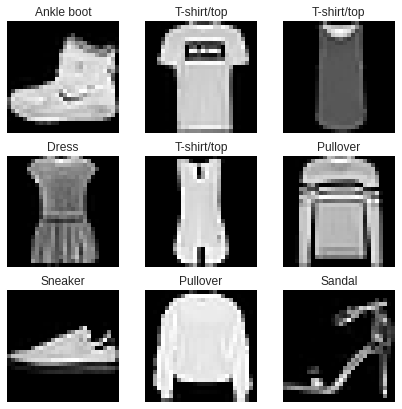

In [11]:
plt.figure(figsize = (7, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = "gray")
    plt.title(class_names[train_labels[i]])

### 2.3. Data preprocessing

In [12]:
#Normalization
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

#One hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

### 2.4. Set Dataset

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size = 100000).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape: (64, 28, 28)
Lables batch shape: (64, 10)


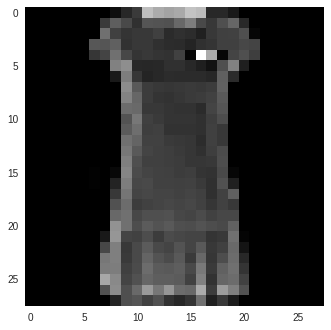

Label: Dress


In [14]:
#Confirm
imgs, lbs = next(iter(train_dataset))
print(f"Feature batch shape: {imgs.shape}")
print(f"Lables batch shape: {lbs.shape}")

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap = "gray")
plt.grid(False)
plt.show()
print(f"Label: {class_names[np.argmax(lb)]}")

## 3. Model

### 3.1. Keras Sequential API

In [15]:
def create_seq_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(128, activation = "relu"))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation = "softmax"))
    return model

seq_model = create_seq_model()

seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 3.2. Keras Functional API

In [16]:
def create_func_model():
    inputs = keras.Input(shape = (28, 28))
    flatten = keras.layers.Flatten()(inputs)
    dense = keras.layers.Dense(128, activation = "relu")(flatten)
    drop = keras.layers.Dropout(0.2)(dense)
    outputs = keras.layers.Dense(10, activation = "softmax")(drop)
    
    model = keras.Model(inputs = inputs, outputs = outputs)
    return model

func_model = create_func_model()

func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 3.3. Model class subclassing

In [17]:
class SubClassModel(keras.Model):
    def __init__(self):
        super(SubClassModel, self).__init__()
        self.flatten = keras.layers.Flatten(input_shape = (28, 28))
        self.dense_01 = keras.layers.Dense(128, activation = "relu")
        self.drop = keras.layers.Dropout(0.2)
        self.dense_02 = keras.layers.Dense(10, activation = "softmax")

    def call(self, x, traing = False):
        x = self.flatten(x)
        x = self.dense_01(x)
        x = self.drop(x)
        return self.dense_02(x)

subclass_model = SubClassModel()

inputs = tf.zeros((1, 28, 28))
subclass_model(inputs)

subclass_model.summary()

Model: "sub_class_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_6 (Dense)             multiple                  100480    
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 4. Training / Validation

### 4.1. Keras API

In [18]:
lr = 0.001

seq_model.compile(optimizer = tf.keras.optimizers.Adam(lr),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])

In [19]:
history = seq_model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.5497 - accuracy: 0.8055 - val_loss: 0.4304 - val_accuracy: 0.8451
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4025 - accuracy: 0.8544 - val_loss: 0.3971 - val_accuracy: 0.8572
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3678 - accuracy: 0.8661 - val_loss: 0.3723 - val_accuracy: 0.8658
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3439 - accuracy: 0.8740 - val_loss: 0.3597 - val_accuracy: 0.8740
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3287 - accuracy: 0.8800 - val_loss: 0.3542 - val_accuracy: 0.8709
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3157 - accuracy: 0.8837 - val_loss: 0.3583 - val_accuracy: 0.8733
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3042 - accuracy: 0.8882 - val_loss: 0.3346 - val_accuracy: 0.8822
Epoch 

Text(0.5, 0, 'Epoch')

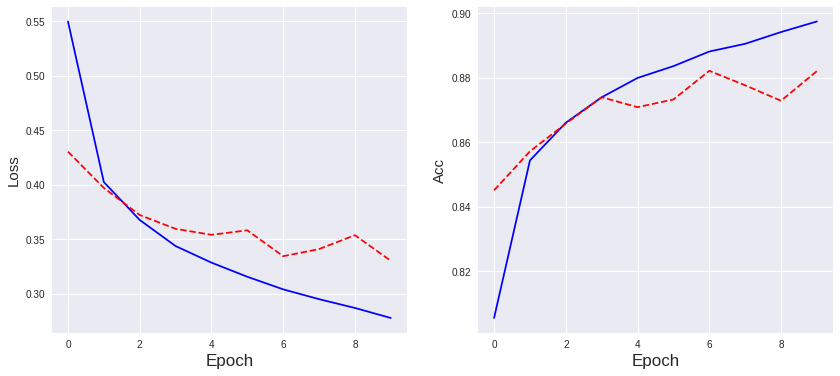

In [20]:
#Results
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

axes[0].plot(history.history["loss"], "b-", label = "loss")
axes[0].plot(history.history["val_loss"], "r--", label = "val_loss")
axes[0].set_ylabel("Loss", fontsize = 15)
axes[0].set_xlabel("Epoch", fontsize = 17)

axes[1].plot(history.history["accuracy"], "b-", label = "acc")
axes[1].plot(history.history["val_accuracy"], "r--", label = "val_acc")
axes[1].set_ylabel("Acc", fontsize = 15)
axes[1].set_xlabel("Epoch", fontsize = 17)

### 4.2. GradientTape

In [21]:
#loss function
loss_object = keras.losses.CategoricalCrossentropy()

#Optimizer
lr = 0.001
optimizer = keras.optimizers.Adam(learning_rate = lr)

#Loss, acc
train_loss = keras.metrics.Mean(name = "train_loss")
train_acc = keras.metrics.CategoricalAccuracy(name = "train_accuracy")
test_loss = keras.metrics.Mean(name = "test_loss")
test_acc = keras.metrics.CategoricalAccuracy(name = "test_accuracy")

In [22]:
@tf.function
def train_step(model, images, labels):
    #training = True is only needed if there are layers with different
    #behavior during training versus inference (e.g. Dropout)
    with tf.GradientTape() as tape:
        predictions = model(images, training = True)
        loss = loss_object(labels, predictions)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_acc(labels, predictions)

In [23]:
@tf.function
def test_step(model, images, labels):
    #training = True is only needed if there are layers with different
    #behavior during training versus inference (e.g. Dropout)
    predictions = model(images, training = False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_acc(labels, predictions)

In [24]:
epochs = 10

for epoch in range(epochs):
    #Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_acc.reset_states()
    test_loss.reset_states()
    test_acc.reset_states()

    for train_images, train_labels in train_dataset:
        train_step(func_model, train_images, train_labels)
    
    for test_images, test_labels in test_dataset:
        test_step(func_model, test_images, test_labels)
    
    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Acc: {train_acc.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Acc: {test_acc.result() * 100}'
    )

Epoch 1, Loss: 0.5581287741661072, Acc: 80.34666442871094, Test Loss: 0.4431515336036682, Test Acc: 83.77999877929688
Epoch 2, Loss: 0.41023507714271545, Acc: 85.30332946777344, Test Loss: 0.4061752259731293, Test Acc: 85.37999725341797
Epoch 3, Loss: 0.37246087193489075, Acc: 86.54500579833984, Test Loss: 0.38391804695129395, Test Acc: 85.80999755859375
Epoch 4, Loss: 0.3543577194213867, Acc: 87.12666320800781, Test Loss: 0.3727429509162903, Test Acc: 86.47999572753906
Epoch 5, Loss: 0.3340148627758026, Acc: 87.71333312988281, Test Loss: 0.3562428951263428, Test Acc: 86.83000183105469
Epoch 6, Loss: 0.32325732707977295, Acc: 88.05833435058594, Test Loss: 0.35222750902175903, Test Acc: 86.72999572753906
Epoch 7, Loss: 0.31305992603302, Acc: 88.49666595458984, Test Loss: 0.33778291940689087, Test Acc: 88.04000091552734
Epoch 8, Loss: 0.30279216170310974, Acc: 88.8066635131836, Test Loss: 0.33704522252082825, Test Acc: 87.93000030517578
Epoch 9, Loss: 0.2955392897129059, Acc: 88.97332763